In [50]:
import pandas as pd
import numpy as np

### Khai báo DataFrame


In [51]:
df1 = pd.DataFrame()
df1

listIndex = ['hsA', 'hsB', 'hsC', 'hsD', 'hsE']
listData = ['Trung', 'Quân', 'Minh', 'Duy', 'Khang']
df2 = pd.DataFrame(listData)
df2

# định nghĩa index
df3 = pd.DataFrame(listData, index = listIndex, columns=['Name'])
df3

#khai báo theo kiểu list of list
df4 = pd.DataFrame([['nv1', 22], ['nv2', 26], ['nv3', 32], ['nv4', 24]], columns = ['Name', 'Age'])
df4

,Name,Age
0,nv1,22
1,nv2,26
2,nv3,32
3,nv4,24


In [52]:
# khai báo theo kiểu dictionary
dic = {'Name' : ['Trung', 'Quân', 'Minh', 'Khang'],
      'Age' : [22, 24,33, 27],
      'Gender': ['Nam', 'Nam', 'Nữ', 'Nam']
      }
df5 = pd.DataFrame(dic)
df5

,Name,Age,Gender
0,Trung,22,Nam
1,Quân,24,Nam
2,Minh,33,Nữ
3,Khang,27,Nam


### Khai báo nên dùng nè

In [53]:
#tạo theo kiểu list dictionary
#giống json nè:))
listDic = [
    {'Name': 'Trung', 'Age': 22, 'Gender': 'Male'},
    {'Name': 'Quân', 'Age': 23, 'Gender': 'Male'},
    {'Name': 'Hân', 'Age': 21, 'Gender': 'Female'}
]

df6 = pd.DataFrame(listDic)
df6



,Name,Age,Gender
0,Trung,22,Male
1,Quân,23,Male
2,Hân,21,Female


### rename column

In [54]:
### rename column
df6.columns = ['Họ Tên', 'Tuổi', 'Giới Tính']
df6

,Họ Tên,Tuổi,Giới Tính
0,Trung,22,Male
1,Quân,23,Male
2,Hân,21,Female


In [55]:
### dùng rename
df6 = df6.rename(columns = {'Họ Tên' : 'Nom'})
df6

df6.rename(columns = {'Giới Tính': 'Genre'}, inplace= True)
df6

,Nom,Tuổi,Genre
0,Trung,22,Male
1,Quân,23,Male
2,Hân,21,Female


### set index = column có giá trị là unique nhaaa

In [56]:
df6.reset_index(inplace= True)

df6.set_index('Nom', inplace= True)
df6


# khôi phục lại
df6.reset_index(inplace= True)

## Thêm column cho data frame = cách thêm 1 seri

In [57]:
#truy xuất 1 cột
df6['Nom']
ser1 = df6['Tuổi']



In [58]:
#thêm cột cho df

ser1 = df6['Tuổi']*2
df6['Salary'] = ser1
df6

,Nom,index,Tuổi,Genre,Salary
0,Trung,0,22,Male,44
1,Quân,1,23,Male,46
2,Hân,2,21,Female,42


### Xóa column


In [59]:
#dùng del -> nó sẽ xóa hẳn luôn (ko tạo bản sao)
temp = pd.DataFrame(df6)

if 'Salary' in temp: 
    del temp['Salary']


temp



,Nom,index,Tuổi,Genre
0,Trung,0,22,Male
1,Quân,1,23,Male
2,Hân,2,21,Female


In [60]:
#dùng pop -> nó sẽ tạo xóa theo kiểu tạo bản sao (lấy đi cột đó) (vẫn phục hồi dc)
temp = pd.DataFrame(df6)

if 'Salary' in temp: 
    temp.pop('Salary')

temp


,Nom,index,Tuổi,Genre
0,Trung,0,22,Male
1,Quân,1,23,Male
2,Hân,2,21,Female


### truy xuất data frames

In [61]:
##xem danh sách column trong df
df6.columns
df6

,Nom,index,Tuổi,Genre,Salary
0,Trung,0,22,Male,44
1,Quân,1,23,Male,46
2,Hân,2,21,Female,42


In [62]:
df6 = df6.append({'Nom' : 'Thành', 'Tuổi': 26, 'Salary': '200'}, ignore_index = True)
df6

,Nom,index,Tuổi,Genre,Salary
0,Trung,0.0,22,Male,44
1,Quân,1.0,23,Male,46
2,Hân,2.0,21,Female,42
3,Thành,NaN,26,NaN,200


In [63]:
df7 = pd.DataFrame(df6, index = ['nv1', 'nv2', 'nv3', 'nv4'])
#truy xuất thông qua label
df7.loc['nv1':'nv3']
df7.loc['nv1':'nv3']['Nom']


nv1    NaN
nv2    NaN
nv3    NaN
Name: Nom, dtype: object

In [64]:
# truy xuất thông qua index
df7.iloc[1:3]
df7.iloc[1:3]['Tuổi']

nv2   NaN
nv3   NaN
Name: Tuổi, dtype: float64

In [65]:
# truy xuất nhiều cột
df7.iloc[1:3, 0:3]

,Nom,index,Tuổi
nv2,NaN,NaN,NaN
nv3,NaN,NaN,NaN


### update, gán giá trị

In [66]:
#dùng copy để tránh khi update giá trị cho df8 thì df6 cũng bị thay đổi
df8 = df6.copy()
df8.loc[1, 'Tuổi'] = 55
df6

,Nom,index,Tuổi,Genre,Salary
0,Trung,0.0,22,Male,44
1,Quân,1.0,23,Male,46
2,Hân,2.0,21,Female,42
3,Thành,NaN,26,NaN,200


### thêm dòng mới
#### mỗi dòng là 1 seri

In [67]:
## thêm bằng index thong qua loc
df5.loc[4] = pd.Series(['Duy', 26, 'Nam'], index = ['Name', 'Age', 'Gender'])
df5

,Name,Age,Gender
0,Trung,22,Nam
1,Quân,24,Nam
2,Minh,33,Nữ
3,Khang,27,Nam
4,Duy,26,Nam


In [68]:
#dùng append
dfTemp = pd.DataFrame([{
    'Name': 'Huy',
    'Age': 43,
    'Gender': 'Nam'
}])

#ignore_index = True để bỏ qua index, đánh lại từ đầu
#nếu ko có thì sẽ thêm hoa, 33, nữ có index = 0
df5 = df5.append(dfTemp)
df5

,Name,Age,Gender
0,Trung,22,Nam
1,Quân,24,Nam
2,Minh,33,Nữ
3,Khang,27,Nam
4,Duy,26,Nam
0,Huy,43,Nam


In [69]:
#dùng append
dfTemp = pd.DataFrame([{
    'Name': 'Hoa',
    'Age': 33,
    'Gender': 'Nữ'
}])

#ignore_index = True để bỏ qua index, đánh lại từ đầu
#nếu ko có thì sẽ thêm hoa, 33, nữ có index = 0
df5 = df5.append(dfTemp, ignore_index = True)
df5

,Name,Age,Gender
0,Trung,22,Nam
1,Quân,24,Nam
2,Minh,33,Nữ
3,Khang,27,Nam
4,Duy,26,Nam
5,Huy,43,Nam
6,Hoa,33,Nữ


### xóa row

In [70]:
#df5.drop(6, inplace = True) 
#df5.drop(index = 1, inplace = True) 
df5.reset_index()

,index,Name,Age,Gender
0,0,Trung,22,Nam
1,1,Quân,24,Nam
2,2,Minh,33,Nữ
3,3,Khang,27,Nam
4,4,Duy,26,Nam
5,5,Huy,43,Nam
6,6,Hoa,33,Nữ


In [71]:
df5.size

21

### Sort

In [72]:
#sắp xếp theo tuổi
df5.sort_values('Age')  # 'Age' or by = 'Age' đều ok

#giảm dần
df5.sort_values(by = 'Age', ascending = False) 

,Name,Age,Gender
5,Huy,43,Nam
2,Minh,33,Nữ
6,Hoa,33,Nữ
3,Khang,27,Nam
4,Duy,26,Nam
1,Quân,24,Nam
0,Trung,22,Nam


In [73]:
df5.sort_index() 

,Name,Age,Gender
0,Trung,22,Nam
1,Quân,24,Nam
2,Minh,33,Nữ
3,Khang,27,Nam
4,Duy,26,Nam
5,Huy,43,Nam
6,Hoa,33,Nữ


In [74]:
## sắp xếp theo tuổi và họ tên
#nếu cùng tuổi thì sắp xếp theo họ tên
#cột ưu tiên trước (tuổi) để bên trái, 
#các cột còn lại theo ưu tiên từ trái qua phải

df5.sort_values(['Age', 'Name'])

,Name,Age,Gender
0,Trung,22,Nam
1,Quân,24,Nam
4,Duy,26,Nam
3,Khang,27,Nam
6,Hoa,33,Nữ
2,Minh,33,Nữ
5,Huy,43,Nam


### xem hạng

In [75]:
df5.rank()

,Name,Age,Gender
0,7.0,1.0,3.0
1,6.0,2.0,3.0
2,5.0,5.5,6.5
3,4.0,4.0,3.0
4,1.0,3.0,3.0
5,3.0,7.0,3.0
6,2.0,5.5,6.5


In [76]:
# info của df
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    7 non-null      object
 1   Age     7 non-null      int64 
 2   Gender  7 non-null      object
dtypes: int64(1), object(2)
memory usage: 296.0+ bytes


In [77]:
df6.describe()

df6.describe(include = 'all')

,Nom,index,Tuổi,Genre,Salary
count,4,3.0,4.000000,3,4.0
unique,4,NaN,NaN,2,4.0
top,Trung,NaN,NaN,Male,44.0
freq,1,NaN,NaN,2,1.0
mean,NaN,1.0,23.000000,NaN,NaN
std,NaN,1.0,2.160247,NaN,NaN
min,NaN,0.0,21.000000,NaN,NaN
25%,NaN,0.5,21.750000,NaN,NaN
50%,NaN,1.0,22.500000,NaN,NaN
75%,NaN,1.5,23.750000,NaN,NaN


#### Any: kiểm tra có tồn tại ptu nào true
#### All: ktra tất cả ptu có true hay ko

In [78]:
dfTemp = pd.DataFrame([
{
    'Name': 'Hoa',
    'Age': 33,
    'Gender': 'Nữ'
},
{
    'Name': 'Mai',
    'Age': 23,
    'Gender': np.NaN
}
])

df6 = df6.append(dfTemp, ignore_index = True)

In [93]:
dic = {'Name' : ['Trung', 'Quân', 'Minh', 'Khang', 'Trang', 'Huyền', 'Vũ', 'Hằng'],
      'Age' : [22, 24,30, 55, 33,21,np.NaN, 44],
      'Gender': ['Nam', 'Nam', 'Nữ', 'Nam', np.NaN, 'Nữ', 'Nữ', 'Nữ'],
       'Salary':[10000,4222,411,645,400, 345,1000,500]
}

df = pd.DataFrame(dic)

In [80]:
## ktra df có giá trị null hay ko
df.isnull() #return về matrix True-False
df.isnull().any()

Name      False
Age        True
Gender     True
Salary     True
dtype: bool

In [81]:
## ktra tất cả giá trị của df là null hay ko
df.isnull().all()

Name      False
Age       False
Gender    False
Salary    False
dtype: bool

###### 

In [82]:
#ktra cột 'Name' có null hay ko
df['Name'].isnull().any()

False

In [83]:
#tính tổng lương của các nhân viên: (theo seri)
df['Salary'].sum()

df

,Name,Age,Gender,Salary
0,Trung,22.0,Nam,10000.0
1,Quân,24.0,Nam,4222.0
2,Minh,30.0,Nữ,411.0
3,Khang,55.0,Nam,645.0
4,Trang,33.0,NaN,NaN
5,Huyền,21.0,Nữ,345.0
6,Vũ,NaN,Nữ,1000.0
7,Hằng,44.0,Nữ,500.0


In [84]:
#tính tổng theo kiểu dataframe
df.sum(axis=0)

C:\Users\trung\AppData\Local\Temp/ipykernel_22476/115502781.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.sum(axis=0)


Name      TrungQuânMinhKhangTrangHuyềnVũHằng
Age                                    229.0
Salary                               17123.0
dtype: object

In [85]:
#đếm các record != null
df.count()

Name      8
Age       7
Gender    7
Salary    7
dtype: int64

### tứ phân vị (là cái 25%, 50%, 78% trong hàm describe)
với mảng [3,6,1,8,2,9,4]
B1: Sắp xếp theo thứ tự: 1, 2, 3, 4, 5, 6, 7, 8, 9


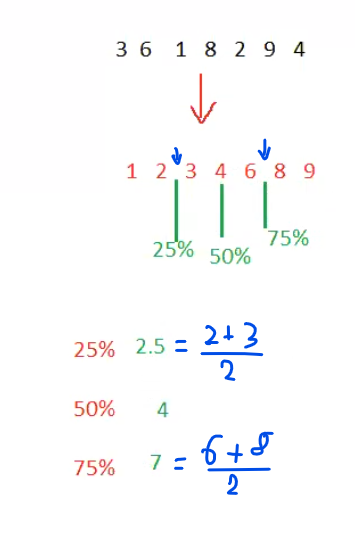

In [86]:
from PIL import Image
image = Image.open('4phanvi.png')
image

In [87]:
###hàm thống kê chung
#describe là thống kê trên các cột có kiểu là số
df.describe()



,Age,Salary
count,7.000000,7.000000
mean,32.714286,2446.142857
std,12.645345,3603.099380
min,21.000000,345.000000
25%,23.000000,455.500000
50%,30.000000,645.000000
75%,38.500000,2611.000000
max,55.000000,10000.000000


In [88]:
print(df)

df['Age'].sort_values()

    Name   Age Gender   Salary
0  Trung  22.0    Nam  10000.0
1   Quân  24.0    Nam   4222.0
2   Minh  30.0     Nữ    411.0
3  Khang  55.0    Nam    645.0
4  Trang  33.0    NaN      NaN
5  Huyền  21.0     Nữ    345.0
6     Vũ   NaN     Nữ   1000.0
7   Hằng  44.0     Nữ    500.0


5    21.0
0    22.0
1    24.0
2    30.0
4    33.0
7    44.0
3    55.0
6     NaN
Name: Age, dtype: float64

In [94]:
#tìm giá trị trung vị (50%) của salary
np.quantile(df['Salary'], 0.5)

#tương đương nè:)))
np.median(df['Salary'])

572.5

In [96]:
#tìm giá trị ở 25%
np.quantile(df['Salary'], 0.25)


408.25

In [99]:
#tìm giá trị ở 75%
np.quantile(df['Salary'], 0.75)

1805.5

In [101]:
np.median(df['Salary'])

572.5

In [102]:
#tìm giá trị ở 25%
np.quantile(df['Salary'], 0.25)

408.25

In [103]:
#thống kê tất cả các column:)))
df.describe(include = 'all')

,Name,Age,Gender,Salary
count,8,7.000000,7,8.000000
unique,8,NaN,2,NaN
top,Trung,NaN,Nữ,NaN
freq,1,NaN,4,NaN
mean,NaN,32.714286,NaN,2190.375000
std,NaN,12.645345,NaN,3413.362688
min,NaN,21.000000,NaN,345.000000
25%,NaN,23.000000,NaN,408.250000
50%,NaN,30.000000,NaN,572.500000
75%,NaN,38.500000,NaN,1805.500000
